<a href="https://colab.research.google.com/github/merriekay/CS65-Notes/blob/main/Day24_Project_Work_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day24: Project Work Day
#### CS65: Introduction to Computer Science I

__Date__: Monday, December 5th, 2022

## Attendance Question:

## Admin Stuff

[Course Evaluations](https://drake.qualtrics.com/jfe/form/SV_5C7sDpd4dNygrxc):
- URL: https://drake.qualtrics.com/jfe/form/SV_5C7sDpd4dNygrxc 


I'll leave the room for 10 minutes, and be back at [__insert time here__]. 



## Final Project Presentations

__Details__:
- Wednesday, December 7th, 2022
- Everyone who can join in person, please do so. 
- Everyone in class will be asked to join the [Zoom session](https://drake-edu.zoom.us/j/83479615507?pwd=M0czTGptbFBzVmw5ZFl3c2lXYmRJUT09) (even though we'll all be in the same room)
- When it is your turn to present, you'll be asked to share your screen and give up a **quick** walkthrough of your project. Mainly a demo. 




## 💥 Collision Code

If you're interested in how this works, let's go through it on the board.

In [ ]:
from graphics import *

score = 0
scored = False
win = GraphWin("Moving a Circle", 500, 500)
win.setCoords(0,0,1,1)

#i'm purposeless defining these objects with the 'smaller' point first.
rect = Rectangle( Point(0.5,0.5),Point(0.75, 0.75))
rect.setFill('green')
rect.draw(win)

#creates a red circle on the window
circ = Circle(Point(0.25,0.25), 0.05)
circ.setFill("red")
circ.draw(win)

score_str = "Score: "+str(score)
score_text = Text(Point(0.1,0.1), score_str)
score_text.setSize(20)
score_text.draw(win)

def check_collision(circ, rect):
    #https://mcsp.wartburg.edu/zelle/python/graphics/graphics/node7.html
    #getP1() and getP2() return the circle's bounding box.
    
    cp1x = circ.getP1().getX()
    cp1y = circ.getP1().getY()
    cp2x = circ.getP2().getX()
    cp2y = circ.getP2().getY()
    
    rp1x = rect.getP1().getX()
    rp1y = rect.getP1().getY()
    rp2x = rect.getP2().getX()
    rp2y = rect.getP2().getY()
    
    #check to see if the circle collides with the rect
    #rectangle is fixed in this case
    if cp2x > rp1x and cp1x < rp2x:
        if cp2y > rp1y and cp1y < rp2y:
            print("Collision!")
            return True
    else:
        return False

def update_score(score):
    score +=1
    score_str = "Score: "+str(score)
    score_text.setText(score_str)
    return score

#while the user doesn't close the window... 
while win.isOpen():
    #check if the user just pressed an arrow key
    # and if so, move the circle in that direction.
    key = win.getKey()
    print(key)
    if check_collision(circ, rect):
        rect.setFill('cyan')
        if scored == False:
            score = update_score(score)
            scored = True
    else:
        rect.setFill('green')
        scored = False
    
    if key == 'Up' or key == 'w':
        circ.move(-0,0.05)
    elif key == 'Down' or key == 's':
        circ.move(0,-0.05)
    elif key == 'Right' or key == 'd':
        circ.move(0.05,0)
    elif key == 'Left' or key == 'a':
        circ.move(-0.05,0)


## Collision Code Explanation
So, we have two shapes:
- we can use `circ.getP1()` and `circ.getP2()` to get the bounding box around a circle
- we can use `rect.getp1()` and `rect.getP2()` to get the corners of a rectangle. 
![image.png](attachment:image.png)

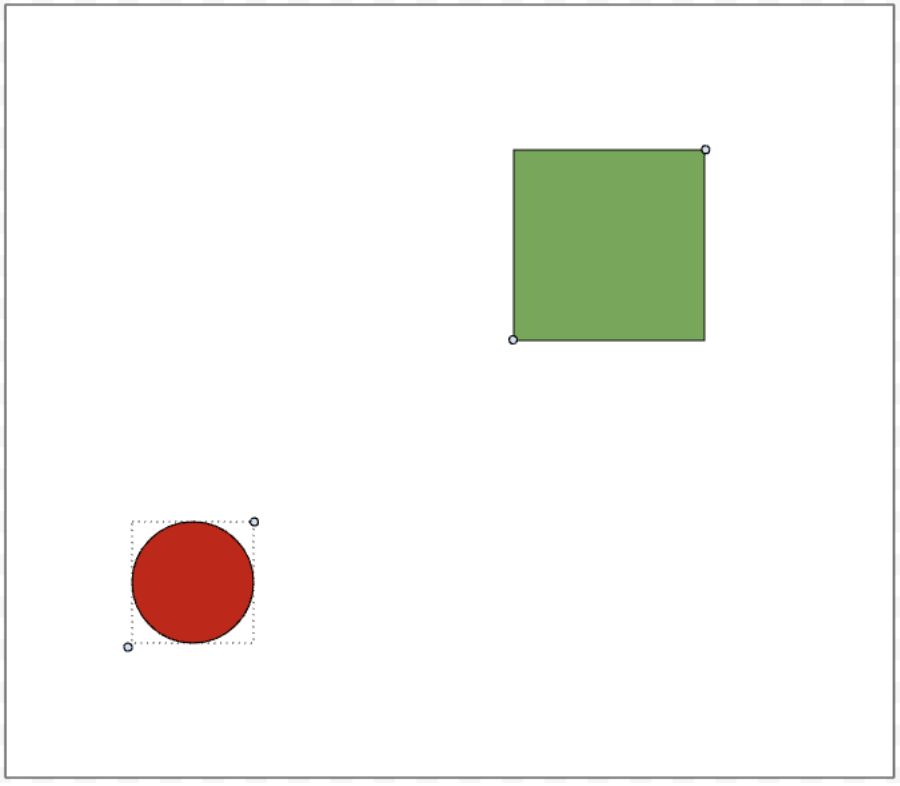

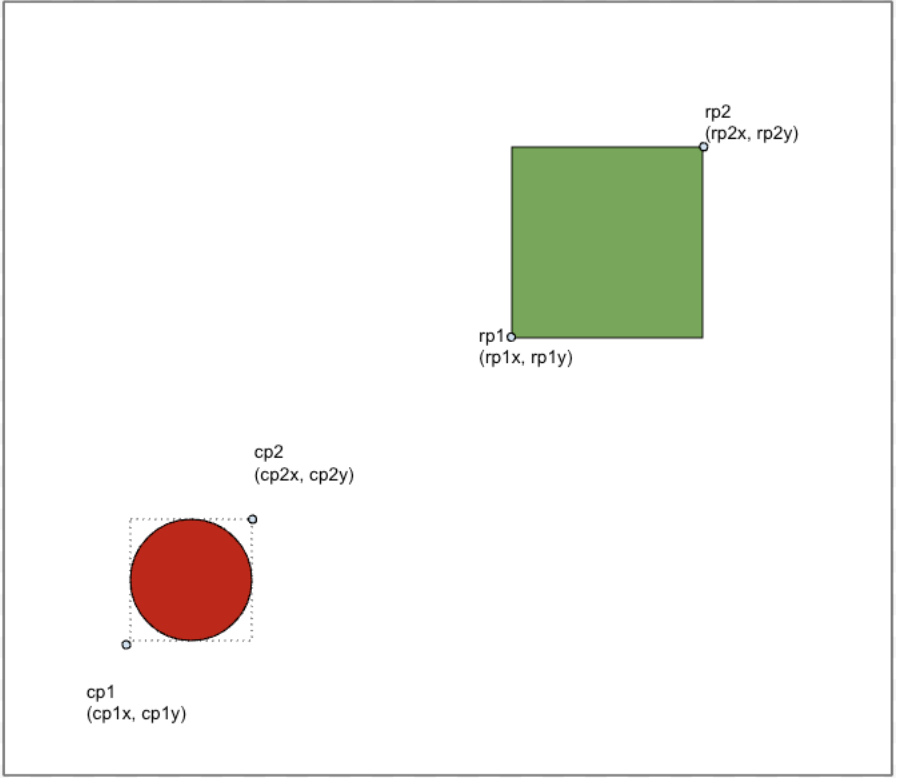

We can infer the Points on the other corners since we have the x and y components from both `P1` and `P2`, like so:

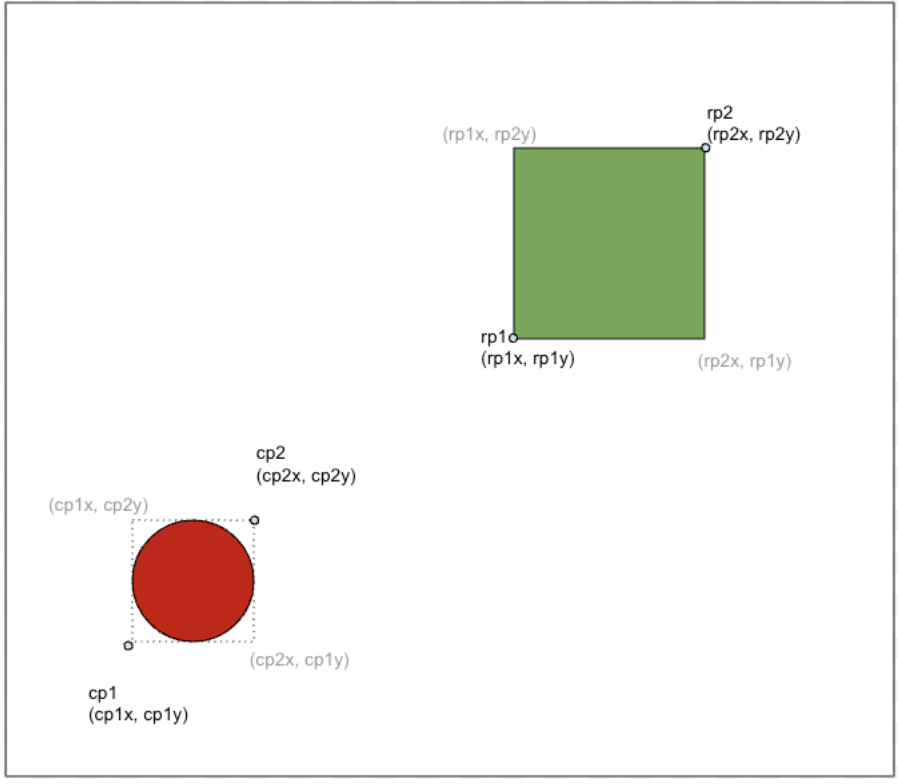

Next it's really just a matter of doing some nitty gritty if statements. I'd recommend taking it one dimension at a time. Let's start with the `x` dimension:

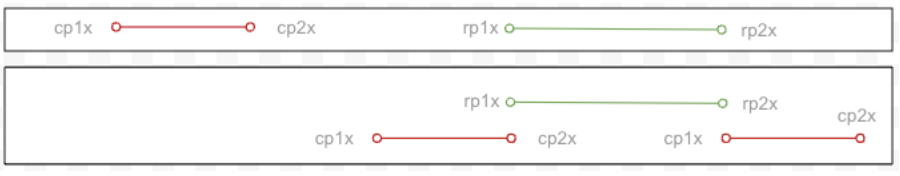

So, from this, we know that there's a collision in the x direction if `cp2x > rp1x and cp1x < rp2x` 

Now, try the same method for the y direction.